In [208]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [209]:
os.chdir("C:/Users/rakshith/Desktop/DataSets/Intern_buddy")

In [210]:
train = pd.read_excel('internbuddy_data_v1.xlsx')

In [211]:
train.shape

(392, 24)

In [212]:
train.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
Unnamed: 10                   0 non-null float64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  378 non-null object
Degree                        380 non-null object
Stream   

In [214]:
train.describe()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),Unnamed: 10,AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Current Year Of Graduation
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,0.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.375000,0.566327,0.461735,0.612245,0.403061,1.346939,1.045918,0.770408,NaN,0.015306,0.265306,0.035714,0.086735,0.178571,2018.867347
std,0.975237,0.905052,0.842336,0.911789,0.837602,1.071386,1.022976,0.966626,NaN,0.122924,0.715928,0.255377,0.401567,0.499360,2.280296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2018.750000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,1.000000,3.000000,2.000000,2.000000,2.000000,2023.000000


# Missing Value Analysis

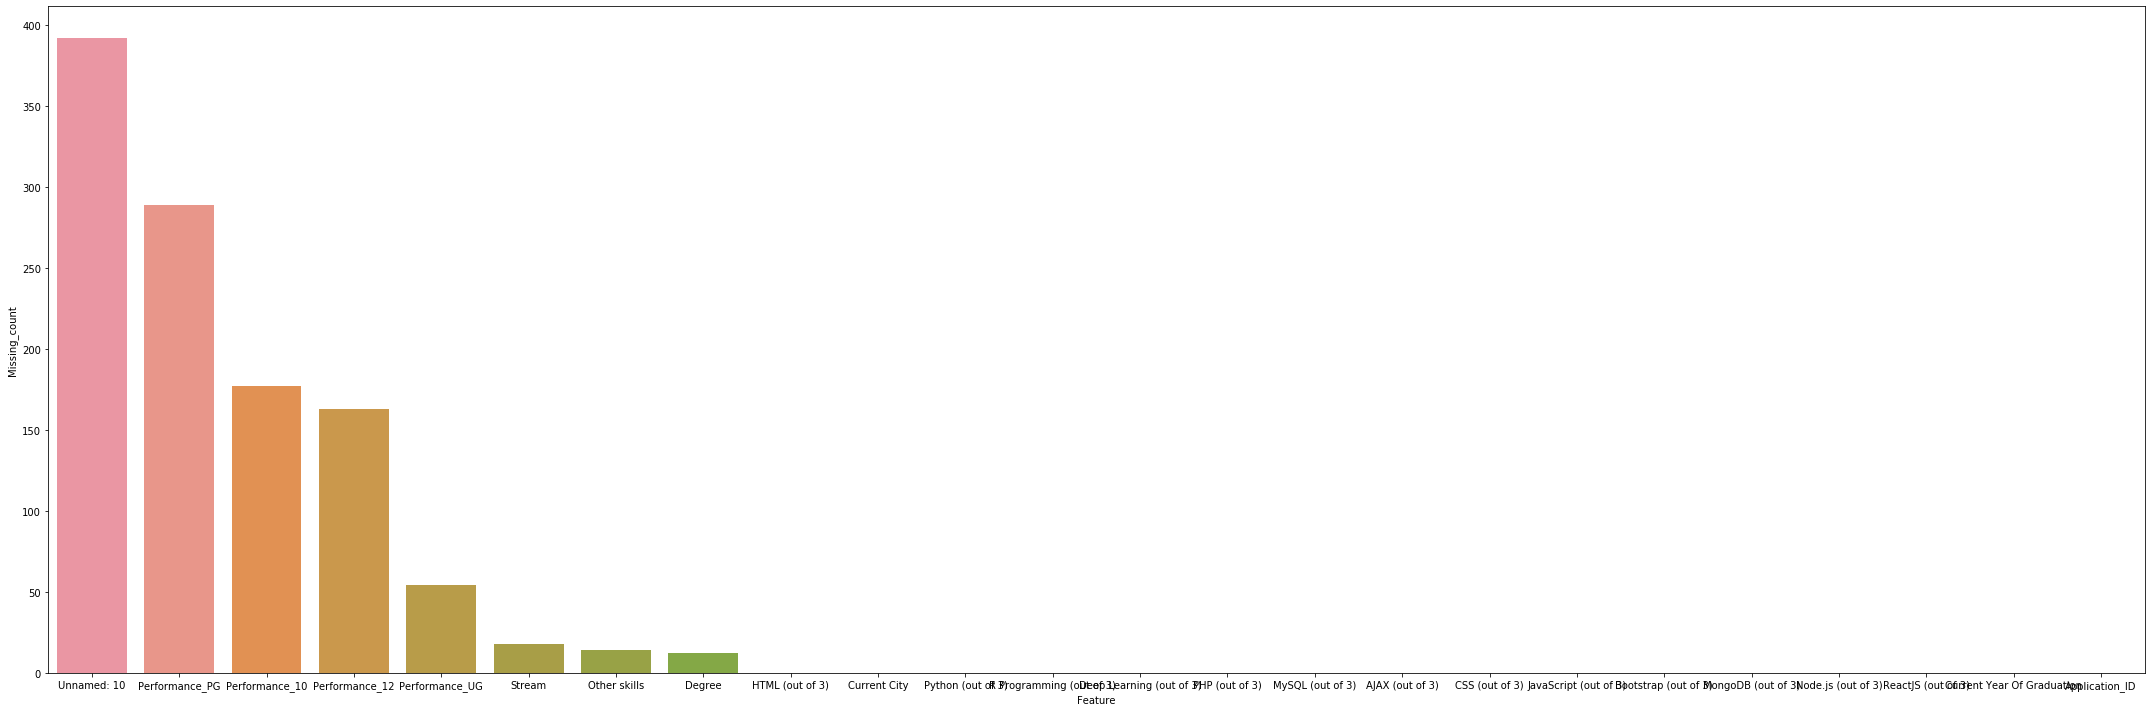

In [215]:
missing_df=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)).reset_index()
missing_df.columns = ['Feature','Missing_count']
plt.figure(figsize=(30,10))
sns.barplot(x='Feature',y='Missing_count',data=missing_df)
plt.tight_layout()

In [216]:
# Will drop unnamed:10 as it contains only null value
# Will drop performance_PG,majority of entries are null values, and most might not have had PG Level of education.
# Will drop performance_10, as it does'nt provide much info about candidate's performance and it also has majority null values.
drop_cols = ['Unnamed: 10','Performance_PG','Performance_10']
train.drop(drop_cols,axis=1,inplace=True)

In [217]:
# Will convert performance in  UG to a scale of 10.
def ug_convert(perf):
        if perf.split('/')[1] == '100':
            return float(perf.split('/')[0])/100
        else:
            return float(perf.split('/')[0])
            

train['Performance_UG']=train['Performance_UG'].dropna().apply(lambda x:ug_convert(x))            

In [218]:
# Will convert performance in 12 to a scale of 10
def perf_12_convert(perf):
    return float(perf.split('/')[0])/10


train['Performance_12']=train['Performance_12'].dropna().apply(lambda x:perf_12_convert(x))

In [219]:
# Will impute the missing data of Performance in 12 and UG with median values
train['Performance_12'].fillna(train['Performance_12'].median(),inplace=True)
train['Performance_UG'].fillna(train['Performance_UG'].median(),inplace=True)

In [220]:
train.isnull().sum()

Application_ID                 0
Current City                   0
Python (out of 3)              0
R Programming (out of 3)       0
Deep Learning (out of 3)       0
PHP (out of 3)                 0
MySQL (out of 3)               0
HTML (out of 3)                0
CSS (out of 3)                 0
JavaScript (out of 3)          0
AJAX (out of 3)                0
Bootstrap (out of 3)           0
MongoDB (out of 3)             0
Node.js (out of 3)             0
ReactJS (out of 3)             0
Other skills                  14
Degree                        12
Stream                        18
Current Year Of Graduation     0
Performance_UG                 0
Performance_12                 0
dtype: int64

In [221]:
# Handling Missing data in 'Other skills ','Degree','Stream '
train[['Other skills','Degree','Stream']].head()

,Other skills,Degree,Stream
0,R Programming,Bachelor of Science (B.Sc),Mathematics
1,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering
2,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science
3,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication
4,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering


In [222]:
# Replacing computer related streams with 'Computer Science & Engineering'
train['Stream'].replace(['Computer Science And Application','Software Engineering','Computer Science And Mathematics',
                       'Computer Science AndEngineering','Computer  Science And Engineering','computer science',
                       'CSE With Cloud Computing','Computer  Science','cs'],'Computer Science & Engineering',inplace=True)

In [223]:
# Imputing missing value with 'Computer Science & Engineering' as it has the most number.
train['Stream'].fillna('Computer Science & Engineering',inplace=True)

In [224]:

train[train['Degree'].isnull()]['Stream']

5                            Data Science Engineering
6                             Artificial Intelligence
12     Advanced Pg Diploma In Artificial Intelligence
52                                     Data Analytics
64                                       Data Science
101             Advance Diploma In Big Data Analytics
117                           Artificial Intelligence
137                       Advanced Big Data Analytics
192      Business Analytics And Business Intelligence
212      Machine Learning And Artificial Intelligence
247                                  Motel Management
367                                  Motel Management
Name: Stream, dtype: object

In [225]:
#Imputing the missing values of degree based on their respective streams
def degree_impute(null_df,df):
    for i in null_df.index:
        if 'Engineering' in null_df['Stream'][i].split():
            df['Degree'].loc[i] = 'Bachelor of Engineering (B.E)'
        elif 'Management' in null_df['Stream'][i].split():
            df['Degree'].loc[i] = 'MBA'
        elif 'Diploma' in null_df['Stream'][i].split():
            df['Degree'].loc[i] = 'Post Graduate Diploma'
        else:
            df['Degree'].loc[i] = 'Bachelor of Technology (B.Tech)'
            

degree_impute(train[train['Degree'].isnull()],train)

C:\Users\rakshith\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [226]:
train.isnull().sum()

Application_ID                 0
Current City                   0
Python (out of 3)              0
R Programming (out of 3)       0
Deep Learning (out of 3)       0
PHP (out of 3)                 0
MySQL (out of 3)               0
HTML (out of 3)                0
CSS (out of 3)                 0
JavaScript (out of 3)          0
AJAX (out of 3)                0
Bootstrap (out of 3)           0
MongoDB (out of 3)             0
Node.js (out of 3)             0
ReactJS (out of 3)             0
Other skills                  14
Degree                         0
Stream                         0
Current Year Of Graduation     0
Performance_UG                 0
Performance_12                 0
dtype: int64

In [227]:
#Treating the missing values in 'Other skills'
#Extracting the skills from each individual
skill_list = []
for i in train['Other skills'].dropna().index:
    skills = train['Other skills'][i].split()
    for j in range(len(skills)):
        skill_list.append(skills[j])

In [228]:
#Checking the Main skills of candidates whose other skills are missing
skill_df=train[train['Other skills'].isnull()][['Python (out of 3)','R Programming (out of 3)','Deep Learning (out of 3)','PHP (out of 3)',
                                       'MySQL (out of 3)','HTML (out of 3)','CSS (out of 3)','JavaScript (out of 3)',
                                     'AJAX (out of 3)','Bootstrap (out of 3)','MongoDB (out of 3)','Node.js (out of 3)','ReactJS (out of 3)']]

In [229]:
skill_df

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
18,0,0,0,0,0,2,1,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0
169,0,0,0,0,0,2,2,1,0,0,0,0,0
193,0,0,0,0,0,2,2,1,0,0,0,0,0
211,0,0,0,0,0,0,0,0,0,0,0,0,0
265,0,0,2,0,0,0,0,0,0,0,0,0,0
278,0,0,0,0,0,0,0,0,0,0,0,0,0
280,0,0,3,0,0,0,0,0,0,0,0,0,0
288,0,0,0,0,0,0,0,0,0,0,0,0,0
301,0,2,0,0,0,0,0,0,0,0,0,0,0


In [230]:
# Replacing missing value with one of the skill provided
for i in skill_df.columns:
    for j in skill_df.index:
        if skill_df[i][j] != 0:
            train['Other skills'].loc[j] = i.split()[0]
            

In [231]:
train['Other skills'].replace('Deep','Deep Learning',inplace=True)

In [232]:
train['Other skills'].isnull().sum()  # 6 more null entries for 'Other skills'

6

In [233]:
# Since these candidates have 0 scoring on all of the programming features and no entries in the 'Other skill'. will drop these.
poor_skill_indexes = train[train['Other skills'].isnull()].index # will use this for our model evaluation
train.fillna('no relevant skills',inplace = True)

# Feature Engineering

In [234]:
# Features to be derived from the existing features are
# Data science score
# Web development score
# other_skills_DS_score
# other_skills_WD_score
# Years after graduating
# Whether holding quantitative degree

In [235]:
train['DS_score'] = train['Python (out of 3)']+train['R Programming (out of 3)']+train['Deep Learning (out of 3)']+train['MySQL (out of 3)']+train['MongoDB (out of 3)']
train['WD_score'] = train['PHP (out of 3)']+train['HTML (out of 3)']+train['CSS (out of 3)']+train['JavaScript (out of 3)']+train['AJAX (out of 3)']+train['Bootstrap (out of 3)']+train['Node.js (out of 3)']+train['ReactJS (out of 3)']

In [236]:
ds_skill = ['Data Analytics','Natural Language Processing','Machine Learning','MATLAB','Image Processing',
            'Artificial Intelligence','MS-Excel','Neural Networks','Stastical modelling','Computer vision']

train['otherSkill_ds_score'] = 0
for skill in ds_skill:
    for i in train.index:
        if skill.lower() in train['Other skills'][i].lower():
            train['otherSkill_ds_score'][i] = train['otherSkill_ds_score'][i]+1
        else:
            train['otherSkill_ds_score'][i] = train['otherSkill_ds_score'][i]
    

C:\Users\rakshith\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rakshith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [237]:
wd_skill = ['Data structures','jQuery','C++','Django','Java','AngularJS']

train['otherSkill_wd_score'] = 0
for skill in wd_skill:
    for i in train.index:
        if skill.lower() in train['Other skills'][i].lower():
            train['otherSkill_wd_score'][i] = train['otherSkill_wd_score'][i]+1
        else:
            train['otherSkill_wd_score'][i] = train['otherSkill_wd_score'][i]

C:\Users\rakshith\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\rakshith\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [238]:
train['Year_after_grad'] = 2020 - train['Current Year Of Graduation']

In [239]:
train.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Degree,Stream,Current Year Of Graduation,Performance_UG,Performance_12,DS_score,WD_score,otherSkill_ds_score,otherSkill_wd_score,Year_after_grad
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,Bachelor of Science (B.Sc),Mathematics,2017,2.415,7.283,2,11,0,0,3
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,0.855,9.220,4,8,2,0,1
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,Master of Science (M.Sc),Computer Science & Engineering,2018,0.700,6.483,6,6,3,3,2
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,Bachelor of Engineering (B.E),Electronics and Communication,2019,6.860,7.600,4,3,1,0,1
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,Bachelor of Technology (B.Tech),Production Engineering,2018,6.380,6.520,4,10,0,2,2


In [242]:
train.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Degree,Stream,Current Year Of Graduation,Performance_UG,Performance_12,DS_score,WD_score,otherSkill_ds_score,otherSkill_wd_score,Year_after_grad
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,Bachelor of Science (B.Sc),Mathematics,2017,2.415,7.283,2,11,0,0,3
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,0.855,9.220,4,8,2,0,1
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,Master of Science (M.Sc),Computer Science & Engineering,2018,0.700,6.483,6,6,3,3,2
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,Bachelor of Engineering (B.E),Electronics and Communication,2019,6.860,7.600,4,3,1,0,1
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,Bachelor of Technology (B.Tech),Production Engineering,2018,6.380,6.520,4,10,0,2,2


In [243]:
# Creating feature to indicate whether they belong to quantitative field or not
quant_degrees = ['Engineering','Technology','Tech','Science']
train['Quantitative_degree'] = 0
for deg in quant_degrees:
    for i in train.index:
        if deg.lower() in train['Degree'][i].lower():
            train['Quantitative_degree'].loc[i]=1
        else:
            pass
        


In [244]:
train.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Stream,Current Year Of Graduation,Performance_UG,Performance_12,DS_score,WD_score,otherSkill_ds_score,otherSkill_wd_score,Year_after_grad,Quantitative_degree
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,Mathematics,2017,2.415,7.283,2,11,0,0,3,1
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,Computer Science & Engineering,2019,0.855,9.220,4,8,2,0,1,1
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,Computer Science & Engineering,2018,0.700,6.483,6,6,3,3,2,1
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,Electronics and Communication,2019,6.860,7.600,4,3,1,0,1,1
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,Production Engineering,2018,6.380,6.520,4,10,0,2,2,1


# Visualizations

<Figure size 1440x720 with 0 Axes>

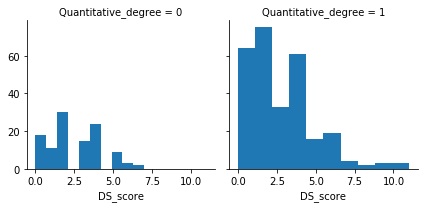

In [245]:
plt.figure(figsize=(20,10))
faces = sns.FacetGrid(col = 'Quantitative_degree',data = train )
faces.map(plt.hist,'DS_score')

<Figure size 1440x720 with 0 Axes>

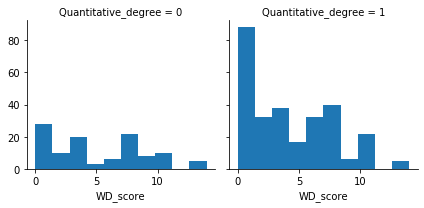

In [246]:
plt.figure(figsize=(20,10))
faces = sns.FacetGrid(col = 'Quantitative_degree',data = train )
faces.map(plt.hist,'WD_score')

From the above plots we can conclude that people with quantitative field tend to have higher score in web development and Data Science.

<Figure size 1440x720 with 0 Axes>

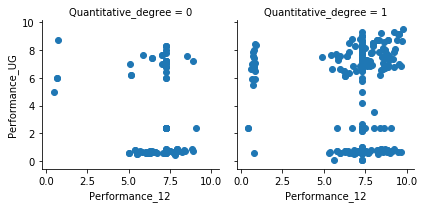

In [247]:
plt.figure(figsize=(20,10))
faces = sns.FacetGrid(col = 'Quantitative_degree',data = train )
faces.map(plt.scatter,'Performance_12','Performance_UG')

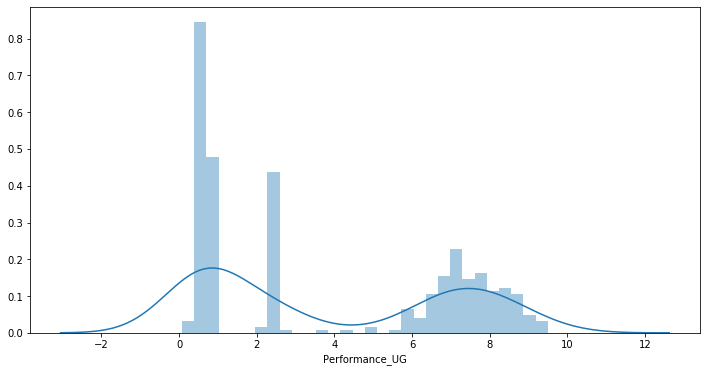

In [248]:
plt.figure(figsize=(12,6))
sns.distplot(train['Performance_UG'],bins=30,kde=True)

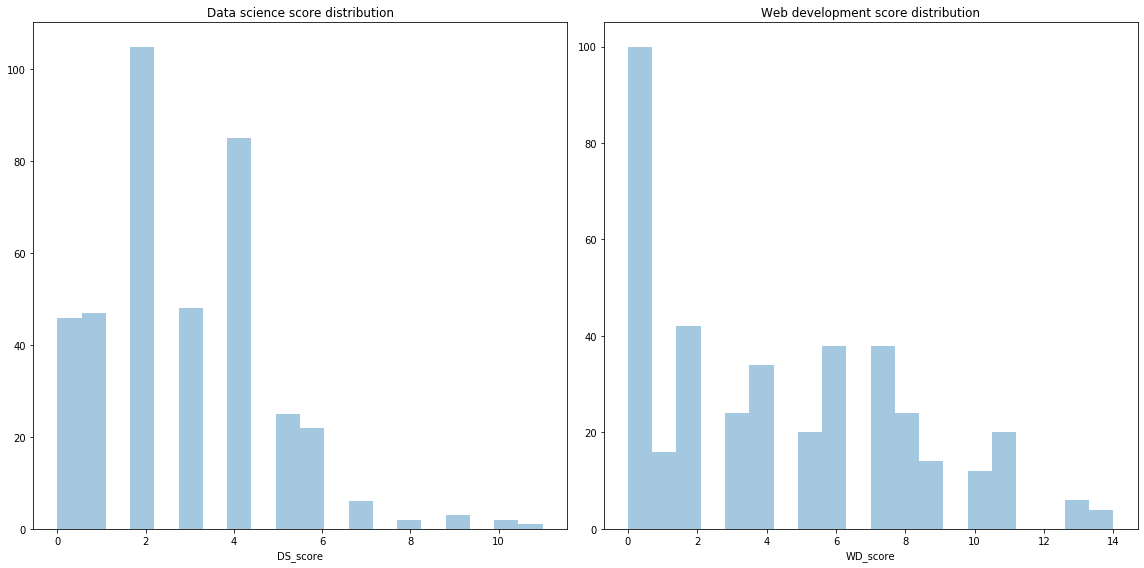

In [249]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
sns.distplot(train['DS_score'],bins=20,ax=ax[0],kde=False)
ax[0].set_title('Data science score distribution')
sns.distplot(train['WD_score'],bins=20,ax=ax[1],kde=False)
ax[1].set_title('Web development score distribution')
plt.tight_layout()



# Correlation amongst features

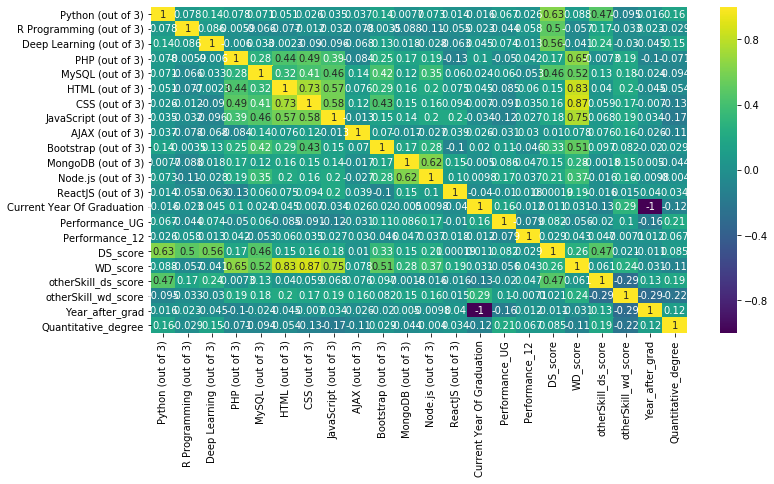

In [250]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),cmap='viridis',annot = True)

In [251]:
train.columns

Index(['Application_ID', 'Current City', 'Python (out of 3)',
       'R Programming (out of 3)', 'Deep Learning (out of 3)',
       'PHP (out of 3)', 'MySQL (out of 3)', 'HTML (out of 3)',
       'CSS (out of 3)', 'JavaScript (out of 3)', 'AJAX (out of 3)',
       'Bootstrap (out of 3)', 'MongoDB (out of 3)', 'Node.js (out of 3)',
       'ReactJS (out of 3)', 'Other skills', 'Degree', 'Stream',
       'Current Year Of Graduation', 'Performance_UG', 'Performance_12',
       'DS_score', 'WD_score', 'otherSkill_ds_score', 'otherSkill_wd_score',
       'Year_after_grad', 'Quantitative_degree'],
      dtype='object')

In [252]:
# dropping few of the features used for feature engineering along with few other features which does'nt contribute much
drop_var= ['Degree','Current Year Of Graduation','Other skills','Stream','Application_ID','Current City']
train.drop(drop_var,axis=1,inplace=True)

# Scaling The data

In [253]:
scaler = MinMaxScaler()
train_scale = scaler.fit_transform(train)

In [254]:
train_scale.shape

(392, 21)

# Principal component analysis

In [255]:
var_ratio={}
for n in range(3,21):
    pc=PCA(n_components=n)
    train_pca=pc.fit(train_scale)
    var_ratio[n]=sum(train_pca.explained_variance_ratio_)

In [256]:
var_ratio

{3: 0.5098683425184464,
 4: 0.5885354007881656,
 5: 0.6464826167095101,
 6: 0.698661468533795,
 7: 0.7470386476419961,
 8: 0.7894313092961297,
 9: 0.8274674187061684,
 10: 0.8593457328751943,
 11: 0.88556496661302,
 12: 0.9095322005080837,
 13: 0.9311457185133344,
 14: 0.9506539586595116,
 15: 0.9657125774753299,
 16: 0.9796289218968597,
 17: 0.9877412838041943,
 18: 0.994992516697906,
 19: 0.9999999999999998,
 20: 0.9999999999999998}

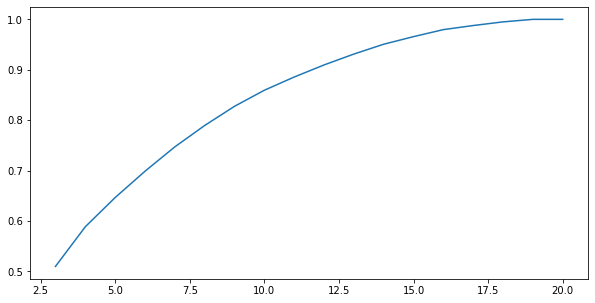

In [257]:
var_series=pd.Series(var_ratio)
plt.figure(figsize=(10,5))
plt.plot(var_series)


From above graph we can conclude number of principal components to be 14, as 95% variance in the data is being explained

In [258]:
pc= PCA(n_components=14).fit(train_scale)
pc_data = pc.transform(train_scale)

In [259]:
PCA_df = pd.DataFrame(pc_data)
pc_data.shape

(392, 14)

In [260]:
# Variance explained by each of PC's
pd.Series(pc.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(14)]) 

PC_0     0.265916
PC_1     0.150869
PC_2     0.093083
PC_3     0.078667
PC_4     0.057947
PC_5     0.052179
PC_6     0.048377
PC_7     0.042393
PC_8     0.038036
PC_9     0.031878
PC_10    0.026219
PC_11    0.023967
PC_12    0.021614
PC_13    0.019508
dtype: float64

In [261]:
pc_df=pd.DataFrame(pc.components_.T,columns=['PC_'+str(i) for i in range(14)],index=train.columns)
pc_df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
Python (out of 3),0.043463,-0.318385,0.528195,0.002550,-0.500944,-0.129620,-0.410057,0.099048,-0.005858,0.090652,-0.055896,0.225302,-0.127364,0.113280
R Programming (out of 3),-0.021296,-0.032554,0.437755,-0.117204,0.615172,0.535603,-0.173417,-0.108041,0.048835,0.080881,-0.063768,0.088082,0.062640,-0.018986
Deep Learning (out of 3),-0.024588,-0.198409,0.282793,0.060454,0.215478,-0.252158,0.645653,0.426292,-0.252699,0.022226,0.089538,-0.004669,-0.025268,0.107949
PHP (out of 3),0.300837,-0.049959,-0.004578,0.003579,0.269892,-0.385659,-0.319382,-0.211292,-0.560189,0.164706,0.292761,-0.102746,-0.009241,-0.201684
MySQL (out of 3),0.252106,-0.070622,0.084742,0.235047,-0.118152,0.042943,0.370732,-0.547012,0.080699,-0.192650,-0.088004,0.084961,-0.243233,-0.428390
HTML (out of 3),0.466976,-0.086171,-0.140751,-0.131977,0.059917,-0.021120,-0.038782,0.478095,0.164492,-0.045881,-0.368556,0.175195,0.167814,-0.326087
CSS (out of 3),0.465552,-0.037231,-0.081834,-0.074582,0.108485,0.035965,-0.086140,0.116894,0.359251,0.021547,0.300737,-0.147960,-0.174533,0.052198
JavaScript (out of 3),0.390782,0.023577,-0.030472,-0.071665,-0.170503,0.324036,0.085097,-0.091152,-0.389514,-0.457016,-0.068035,0.025383,0.061328,0.513677
AJAX (out of 3),0.017333,0.017921,0.010726,0.015612,-0.059739,-0.000830,0.019453,0.008873,0.130894,0.000317,-0.029757,0.005028,-0.163952,-0.153413
Bootstrap (out of 3),0.169434,-0.126041,0.067735,0.172128,0.099113,-0.203090,0.129443,-0.213655,0.461684,0.247620,0.154410,-0.003612,-0.020652,0.466529


# Number of clusters

In [262]:
no_of_clusters=range(1,20)
cluster_errors=[]
for num_clusters in no_of_clusters:
    clusters=KMeans(num_clusters).fit(pc_data)
    cluster_errors.append(clusters.inertia_)

In [263]:
cluster_df=pd.DataFrame({'cluster_count':no_of_clusters,'error_rate':cluster_errors})

Text(0, 0.5, 'ERROR RATE')

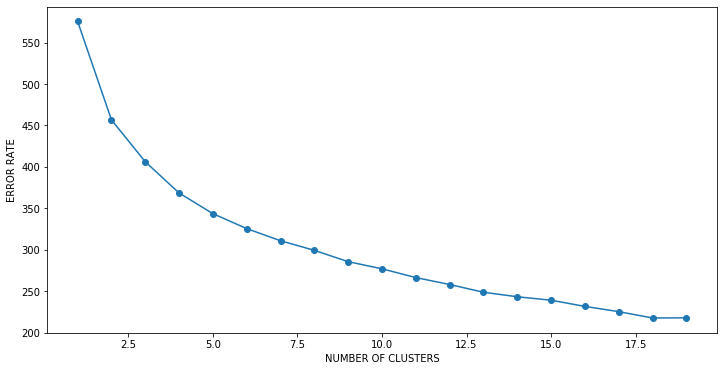

In [264]:

plt.figure(figsize=(12,6))
plt.plot(cluster_df.cluster_count,cluster_df.error_rate,marker="o")
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('ERROR RATE')

In [265]:
# Chekcing for silhoutee score and concluding about the number of clusters to be used
no_of_clusters= range(2,10)
silhouette_score=[]
for num_clusters in no_of_clusters:
    cluster_model=KMeans(n_clusters=num_clusters)
    cluster_labels=cluster_model.fit_predict(pc_data)
    silhouette_value=metrics.silhouette_score(pc_data,cluster_labels)
    silhouette_score.append( silhouette_value)
    print('For n_cluster equal to ',num_clusters,' The silhouette score is ',silhouette_value)

For n_cluster equal to  2  The silhouette score is  0.19061515335076237
For n_cluster equal to  3  The silhouette score is  0.1838450716065121
For n_cluster equal to  4  The silhouette score is  0.1734851283793695
For n_cluster equal to  5  The silhouette score is  0.17386285311120311
For n_cluster equal to  6  The silhouette score is  0.17159666855999706
For n_cluster equal to  7  The silhouette score is  0.1553154197515632
For n_cluster equal to  8  The silhouette score is  0.1598231126346152
For n_cluster equal to  9  The silhouette score is  0.15539895218318997


In [266]:
sil_df=pd.DataFrame({'number_of_clusters':range(2,10),'silhouette_score':silhouette_score})

Text(0, 0.5, 'ERROR RATE')

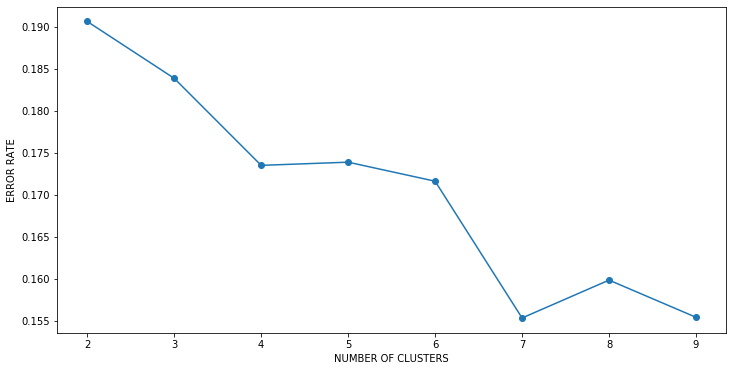

In [267]:
plt.figure(figsize=(12,6))
plt.plot(sil_df.number_of_clusters,sil_df.silhouette_score,marker="o")
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('ERROR RATE')

# From Elbow plot and silhouette graph 3 clusters or segments would be formed

# KMeans with 3 clusters

In [268]:
#Generating clusters
clusters=KMeans(n_clusters=3,random_state=101).fit(pc_data)
#adding cluster to the pc_df
PCA_df['cluster_group'] = clusters.labels_


In [269]:
def scatter_plot(feature1,feature2,feature3,feature4):
    fig,ax=plt.subplots(1,2,figsize=(14,6))
    ax[0].scatter(feature1,feature2,c=clusters.labels_,cmap='viridis_r')
    ax[0].set_xlabel('feature1')
    ax[0].set_ylabel('feature2')
    
    ax[1].scatter(feature3,feature4,c=clusters.labels_,cmap='viridis_r')
    ax[1].set_xlabel('feature3')
    ax[1].set_ylabel('feature4')

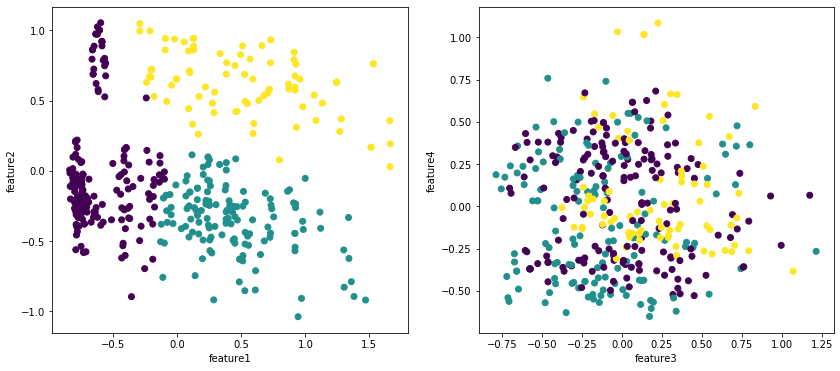

In [270]:
scatter_plot(PCA_df.iloc[:,0],PCA_df.iloc[:,1],PCA_df.iloc[:,2],PCA_df.iloc[:,3])

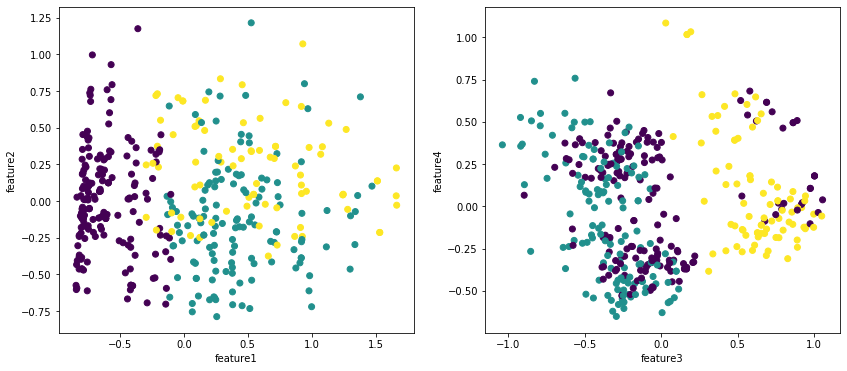

In [271]:
scatter_plot(PCA_df.iloc[:,0],PCA_df.iloc[:,2],PCA_df.iloc[:,1],PCA_df.iloc[:,3])

# Assigning the cluster group to the real data

In [273]:
train['Cluster_group'] = clusters.labels_

In [274]:
train.head()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),...,ReactJS (out of 3),Performance_UG,Performance_12,DS_score,WD_score,otherSkill_ds_score,otherSkill_wd_score,Year_after_grad,Quantitative_degree,Cluster_group
0,0,2,0,2,0,2,3,2,0,2,...,0,2.415,7.283,2,11,0,0,3,1,1
1,2,0,0,2,2,2,2,2,0,0,...,0,0.855,9.220,4,8,2,0,1,1,1
2,3,0,1,2,2,2,0,2,0,0,...,0,0.700,6.483,6,6,3,3,2,1,1
3,2,0,2,1,0,2,0,0,0,0,...,0,6.860,7.600,4,3,1,0,1,1,2
4,2,0,0,2,0,2,1,1,0,0,...,2,6.380,6.520,4,10,0,2,2,1,1


In [275]:
train.groupby('Cluster_group').apply(lambda x:x.mean()).T

Cluster_group,0,1,2
Python (out of 3),1.265060,1.522059,1.312139
R Programming (out of 3),0.686747,0.507353,0.554913
Deep Learning (out of 3),0.253012,0.514706,0.520231
PHP (out of 3),0.963855,1.007353,0.132948
MySQL (out of 3),0.710843,0.661765,0.052023
HTML (out of 3),1.915663,2.132353,0.456647
CSS (out of 3),1.686747,1.860294,0.098266
JavaScript (out of 3),1.397590,1.220588,0.115607
AJAX (out of 3),0.048193,0.014706,0.000000
Bootstrap (out of 3),0.313253,0.573529,0.000000


In [291]:
# Lets visualize only with few important features
cols = ['DS_score','WD_score','otherSkill_ds_score','otherSkill_wd_score','JavaScript (out of 3)','Deep Learning (out of 3)']
imp_feat = train.groupby('Cluster_group').apply(lambda x:x[cols].mean()).T
imp_feat

Cluster_group,0,1,2
DS_score,2.987952,3.264706,2.439306
WD_score,6.638554,7.220588,0.930636
otherSkill_ds_score,0.891566,1.441176,1.069364
otherSkill_wd_score,1.759036,1.066176,0.867052
JavaScript (out of 3),1.397590,1.220588,0.115607
Deep Learning (out of 3),0.253012,0.514706,0.520231


In [283]:
2.98795/(2.98795+6.638554)

0.3103878625095881

In [284]:
3.264706/(3.264706+7.220588)

0.31136046352157604

In [277]:
# Insights from above table
#candidates in cluster 0 have high web development score
#candidates in cluster 1 have high data science score
#candidates in cluster 2 have poor score in both fields


In [278]:
train[train['Cluster_group'] == 0].shape  # probable Number of candidates for web development = 83

(83, 22)

In [279]:
train[train['Cluster_group'] == 2].shape # probable candidates who might not get short listed = 173

(173, 22)

In [280]:
train[train['Cluster_group'] == 1].shape # Probable number of candidates for data science = 136

(136, 22)

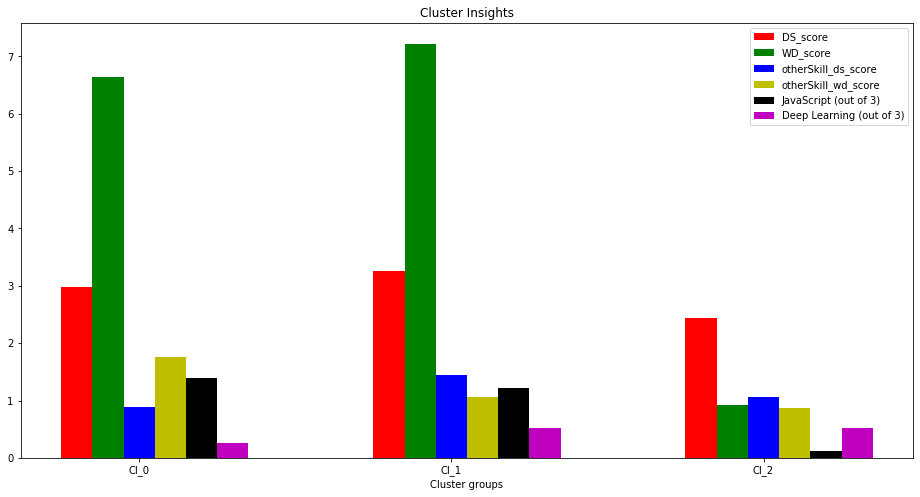

In [289]:
plt.figure(figsize=(16,8))
x_values=np.arange(len(imp_feat.columns))
plt.bar(x_values,imp_feat.loc['DS_score',:].values,color='r',label='DS_score',width=0.1)
plt.bar(x_values+0.1,imp_feat.loc['WD_score',:].values,color='g',label='WD_score',width=0.1)
plt.bar(x_values+0.2,imp_feat.loc['otherSkill_ds_score',:].values,color='b',label='otherSkill_ds_score',width=0.1)
plt.bar(x_values+0.3,imp_feat.loc['otherSkill_wd_score',:].values,color='y',label='otherSkill_wd_score',width=0.1)
plt.bar(x_values+0.4,imp_feat.loc['JavaScript (out of 3)',:].values,color='k',label='JavaScript (out of 3)',width=0.1)
plt.bar(x_values+0.5,imp_feat.loc['Deep Learning (out of 3)',:].values,color='m',label='Deep Learning (out of 3)',width=0.1)


plt.xlabel("Cluster groups")
plt.title("Cluster Insights")
plt.xticks(x_values + 0.2, ('Cl_0', 'Cl_1', 'Cl_2'))
plt.legend(loc=0)

# 1. Cluster 0
1. The score in deep learning is lower than that of cluster1, and score of java script is higher than cluster 1, suggesting that these candidates can be called for interview for the field of web development.

# 2.Cluster 1
1. These candidates have high score in Deep learning and lower score in Javascript, and also has higher data science score compared to cluster 0, Hence These candidates can be called for interview in the field of Data science.

# 3.Cluster 2
1. The candidates belonging to this cluster, can be considered as rejected, since they have poor skill score in both Web development field and Data Science field.

In [282]:
# checking the perforrmance of model/ saved these indexes since they had poor skills in both departments
train.loc[poor_skill_indexes,'Cluster_group']

58     2
211    2
278    2
288    2
303    2
311    2
Name: Cluster_group, dtype: int32

Our model has predicted these candidates as cluster 2, which has candidates with poor skill score, Hence, the model is segmenting candidates clearly.

In [292]:
not_selected_df = train[train['Cluster_group']==2]
DS_candidates = train[train['Cluster_group']==1]
WD_candidates = train[train['Cluster_group']==0]

In [293]:
not_selected_df.to_excel('not_selected.xlsx',index=False)
DS_candidates.to_excel('DS_candidates.xlsx',index=False)
WD_candidates.to_excel('WD_candidates.xlsx',index=False)

# End Notes
1. The otherskill score for both fields can be varied, by adding relevant skills, or removing irrelevant one's.(In the feature engineering part)
2. Other feature's which includes other programming tools can be considered while visuaizing cluster group.
3. Location of the candidate has not been considered for segmenting,since candidates relocating information was not provided.
4. By providing Threshold value number of candidates being shortlisted for interview can be controlled.
